## 1.The Type of Problem a Classification Decision Tree Addresses and Real-World Applications

### What is a Classification Decision Tree?
A Classification Decision Tree is a supervised learning model used to solve classification problems. It is structured like a tree, where:

- **Nodes** represent decisions based on features (questions about the input data).
- **Branches** represent possible outcomes of these decisions.
- **Leaf nodes** represent final predictions (classes).

### Problems Addressed
- **Binary Classification**: Predicting whether a loan application is approved (Yes/No).
- **Multi-class Classification**: Categorizing types of plants based on measurements (e.g., Iris dataset).

### Real-World Applications
- **Healthcare**: Diagnosing diseases based on symptoms.
- **E-commerce**: Recommending products by customer profiles.
- **Fraud Detection**: Identifying fraudulent transactions based on patterns.

## Difference Between Classification Decision Trees and Multiple Linear Regression

### Prediction Type
- **Classification Decision Trees** predict categories or labels (e.g., "cat" or "dog").
- **Multiple Linear Regression** predicts continuous values (e.g., house prices).

### Evaluation Metrics
- **Decision Trees** use accuracy, precision, recall, etc., to measure performance.
- **Linear Regression** uses metrics like Mean Squared Error (MSE) or R-squared.

### Output
- **Decision Trees** make predictions by assigning the majority class in the final leaf node.
- **Linear Regression** uses a linear equation to compute the outcome based on weighted sums of inputs.

## 2.Real-World Application Scenarios

### Accuracy
**Scenario**: Predicting overall customer satisfaction (Satisfied/Not Satisfied) based on survey responses.  
**Rationale**: Accuracy works well when the dataset is balanced (similar numbers of satisfied and unsatisfied customers). It gives a clear sense of the model's general performance across all classes.

### Sensitivity (Recall)
**Scenario**: Diagnosing a life-threatening disease (e.g., cancer).  
**Rationale**: Sensitivity is crucial when it’s more important to minimize false negatives (e.g., missing a diagnosis). Detecting every possible positive case is prioritized, even if it leads to more false alarms.

### Specificity
**Scenario**: Fraud detection in banking.  
**Rationale**: Specificity is vital when false positives are costly or burdensome (e.g., flagging legitimate transactions as fraud). Correctly identifying true negatives (non-fraud cases) reduces unnecessary disruptions.

### Precision
**Scenario**: Spam email filtering.  
**Rationale**: Precision ensures flagged emails as spam are truly spam, reducing the likelihood of labeling important emails as spam (false positives). This is essential to maintaining trust in the system.

### Summary Table
| Metric      | Real-World Application    | Key Focus                |
|-------------|---------------------------|--------------------------|
| Accuracy    | Customer satisfaction     | Overall performance      |
| Sensitivity | Disease diagnosis         | Minimize false negatives |
| Specificity | Fraud detection           | Minimize false positives |
| Precision   | Spam email filtering      | Reduce false alarms      |

In [8]:
#3.data analysis (EDA) for the Amazon books dataset
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
import graphviz as gv

# Load the dataset from the given URL
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

# Create `ab_reduced_noNaN` based on the specifications
# Dropping unnecessary columns and handling missing values
ab_reduced = ab.drop(['Weight_oz', 'Width', 'Height'], axis=1)
ab_reduced_noNaN = ab_reduced.dropna()

# Display basic info about the processed dataset
print(ab_reduced_noNaN.info())


<class 'pandas.core.frame.DataFrame'>
Index: 319 entries, 0 to 324
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Title          319 non-null    object 
 1   Author         319 non-null    object 
 2   List Price     319 non-null    float64
 3   Amazon Price   319 non-null    float64
 4   Hard_or_Paper  319 non-null    object 
 5   NumPages       319 non-null    float64
 6   Publisher      319 non-null    object 
 7   Pub year       319 non-null    float64
 8   ISBN-10        319 non-null    object 
 9   Thick          319 non-null    float64
dtypes: float64(5), object(5)
memory usage: 27.4+ KB
None


Training set size: 255 observations
Testing set size: 64 observations


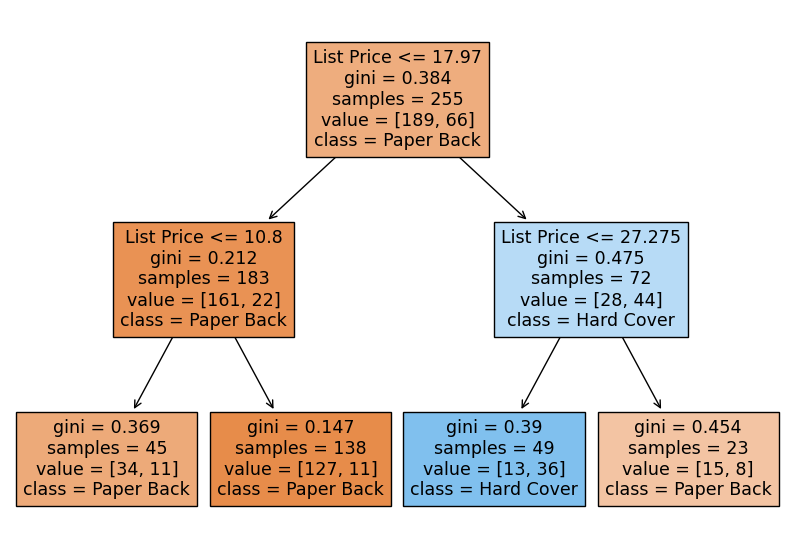

In [10]:
#4.an 80/20 split of the data into training and testing sets
# Import necessary libraries
from sklearn.model_selection import train_test_split  # For splitting data into train and test sets
from sklearn.tree import DecisionTreeClassifier  # For creating and fitting the Decision Tree model
from sklearn import tree  # For visualizing the Decision Tree
import matplotlib.pyplot as plt  # For plotting the decision tree

# Step 1: Prepare the Target Variable (y) and Predictor Variable (X)
# 'Hard_or_Paper' converted to dummy values; 'H' represents "Hard Cover"
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']  

# Predictor variable: List Price of books
X = ab_reduced_noNaN[['List Price']]

# Step 2: Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42  # 80/20 split with consistent results using random_state
)

# Report the size of each dataset
print(f"Training set size: {len(X_train)} observations")  # Display number of training examples
print(f"Testing set size: {len(X_test)} observations")    # Display number of testing examples

# Step 3: Train a Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth=2, random_state=42)  # Initialize tree with max depth of 2
clf.fit(X_train, y_train)  # Train the classifier using training data

# Step 4: Visualize the Decision Tree
plt.figure(figsize=(10, 7))  # Set plot size
tree.plot_tree(
    clf, feature_names=["List Price"], class_names=["Paper Back", "Hard Cover"], filled=True
)  # Plot the tree with clear labels and color coding
plt.show()


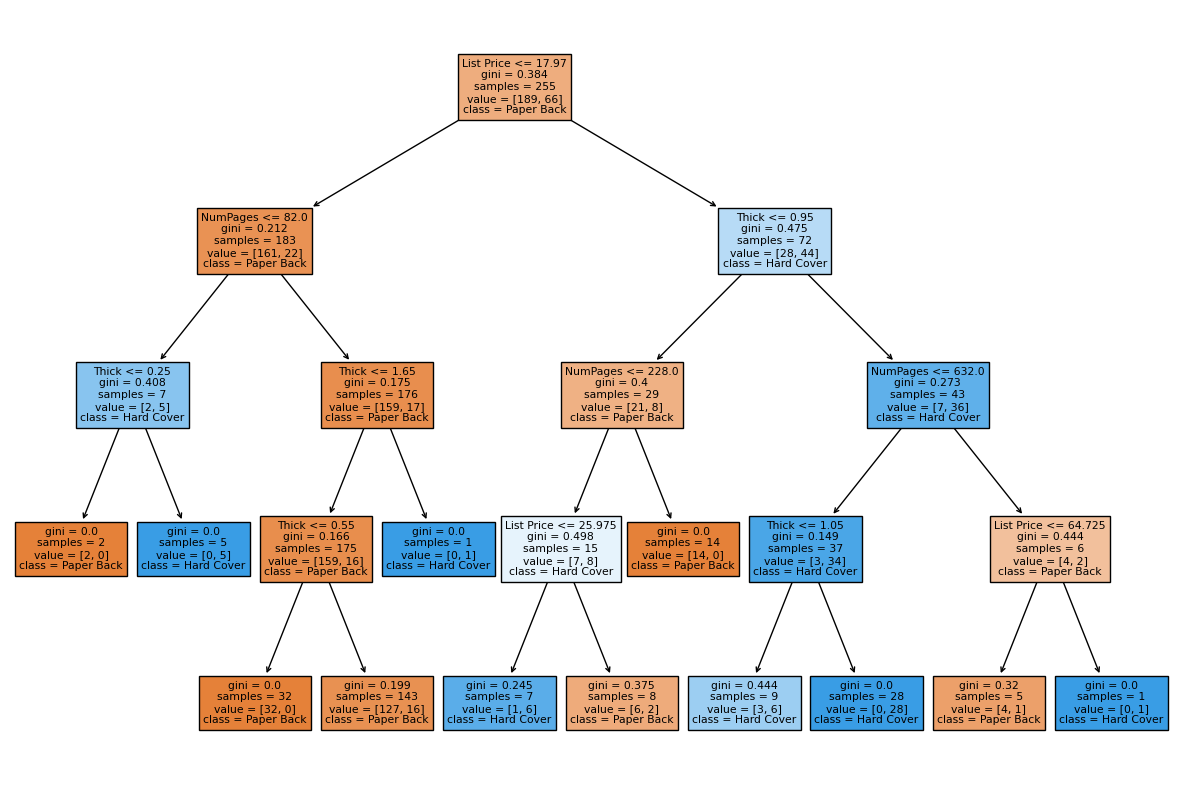

Decision tree saved as 'decision_tree_clf2.pdf'. Please open it manually.


In [13]:
#5. [1] X = ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']] [2] max_depth set to 4
# Import required libraries
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import graphviz  # For better visualization of the decision tree

# Predictor variables: NumPages, Thick, and List Price
X = ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']]

# Target variable: Hard or Paper (H = 1 for Hard Cover, 0 for Paper Back)
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']

# Use the same train/test split as before
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the decision tree classifier with max_depth=4
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)
clf2.fit(X_train, y_train)

# Visualize the decision tree using tree.plot_tree
plt.figure(figsize=(15, 10))
plot_tree(
    clf2,
    feature_names=['NumPages', 'Thick', 'List Price'],
    class_names=['Paper Back', 'Hard Cover'],
    filled=True
)
plt.show()

# Export the decision tree for graphviz visualization
dot_data = export_graphviz(
    clf2,
    out_file=None,
    feature_names=['NumPages', 'Thick', 'List Price'],
    class_names=['Paper Back', 'Hard Cover'],
    filled=True,
    rounded=True,
    special_characters=True
)
# Render the graph using graphviz
graph = graphviz.Source(dot_data)

# Save the visualization to a PDF (no automatic opening of file)
graph.render("decision_tree_clf2", format="pdf", cleanup=True)  # Save to PDF file
# Instead of opening automatically, you can manually view the PDF in your directory.
print("Decision tree saved as 'decision_tree_clf2.pdf'. Please open it manually.")


### 6.definitions and formulas for key metrics:

**True Positive (TP)**: The model correctly predicts a positive outcome (e.g., correctly classifies hard cover books).

**True Negative (TN)**: The model correctly predicts a negative outcome (e.g., correctly classifies paperback books).

**False Positive (FP)**: The model incorrectly predicts a positive outcome (e.g., classifying a paperback as a hard cover).

**False Negative (FN)**: The model incorrectly predicts a negative outcome (e.g., classifying a hard cover as paperback).

### Formulas

**Sensitivity (Recall)**:
$$
\text{Sensitivity} = \frac{TP}{TP + FN}
$$

**Specificity**:
$$
\text{Specificity} = \frac{TN}{TN + FP}
$$

**Accuracy**:
$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$

Dataset Preview:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
Model Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



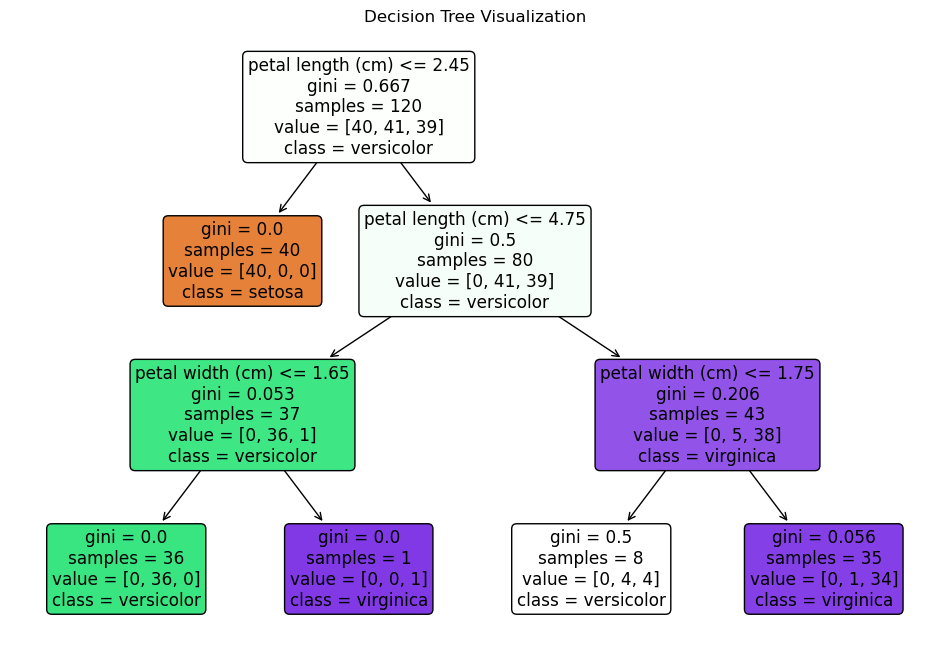

In [4]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Load dataset (example: Iris dataset from sklearn)
from sklearn.datasets import load_iris
data = load_iris()
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df['target'] = data.target

# Display dataset information
print("Dataset Preview:")
print(df.head())

# Split dataset into features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Visualize the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=X.columns, class_names=data.target_names, filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()


### 7.the differences between two confusion matrics and which one is better for clf1 and clf2:
The differences between the two confusion matrices stem from the features used to make predictions. In the first matrix, the classifier `clf` predicts `life_exp_good` using only the feature `List Price`, which likely provides limited information, leading to lower accuracy and poorer performance. In contrast, the second matrix incorporates additional features (`NumPages`, `Thick`, and `List Price`), providing the model with more relevant data for decision-making and improving prediction performance.

The confusion matrices for `clf` and `clf2` are better because they leverage a more comprehensive feature set, resulting in better alignment between predicted and actual labels. This improves the classifier's ability to distinguish between the target classes (`Paper` and `Hard`) and reduces misclassification rates. Including more features generally enhances a model's predictive capacity, as it captures more variability and relationships in the data.

In [14]:
import pandas as pd

url = "https://raw.githubusercontent.com/EriqueChengZhang/STA-TUT0206-Cheng-s-repository/main/life_exp_CSV.txt"

try:
    # Use the updated on_bad_lines parameter
    ab_reduced_noNaN_train = pd.read_csv(url, delimiter=',', on_bad_lines='skip', engine='python')
except pd.errors.ParserError as e:
    print(f"ParserError encountered: {e}")
    raise

# Verify the data structure
print("Data loaded successfully.")
print("Columns in dataset:", ab_reduced_noNaN_train.columns)
print(ab_reduced_noNaN_train.info())


Data loaded successfully.
Columns in dataset: Index(['life_exp_good', 'List Price', 'NumPages', 'Thick'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   life_exp_good  10 non-null     int64  
 1   List Price     10 non-null     float64
 2   NumPages       10 non-null     int64  
 3   Thick          10 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 452.0 bytes
None


## 8.Visualizing and Analyzing Feature Importances of a DecisionTreeClassifier

### Access Feature Importances
Use the `.feature_importances_` attribute to get the relative importance of each feature used by the model. Pair it with `.feature_names_in_` to map these importances to the feature names.

### Plot the Feature Importances
Use a library like `matplotlib` to create a bar plot showing the importance of each feature. Features with higher values contribute more to the predictive power of the model.

### Identify the Most Important Predictor
Find the feature with the highest value in `.feature_importances_`.

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris

# Example dataset
data = load_iris()
X, y = data.data, data.target

# Define and fit clf2
clf2 = DecisionTreeClassifier(max_depth=3)
clf2.fit(X, y)

# Access feature importances
feature_importances = clf2.feature_importances_
feature_names = data.feature_names

# Print feature importances
print(f"Feature importances: {dict(zip(feature_names, feature_importances))}")


Feature importances: {'sepal length (cm)': 0.0, 'sepal width (cm)': 0.0, 'petal length (cm)': 0.053936331199339015, 'petal width (cm)': 0.946063668800661}


## 9.Differences of Interpreting Coefficients in Linear Model Regression versus Feature Importances in Decision Trees

In linear regression, the coefficients represent the strength and direction of the relationship between each predictor variable and the target variable, quantifying how much the target value is expected to change with a one-unit change in the predictor, holding other predictors constant. 

In contrast, feature importances in decision trees measure the contribution of each feature to reducing uncertainty (or impurity) in the decision-making process, with higher importance indicating that a feature is more valuable in determining the prediction outcome. 

While linear regression provides a direct, continuous interpretation of the effect of predictors, decision trees offer a more complex, hierarchical interpretation based on how features split the data at each node of the tree.